## Selore Retail Store
### Case Study: Customer Segmentation

### Objectives

A retail company wants to understand the spending behaviour of its customers to target them with personalized marketing campaigns. They have collected data on customer demographics (age, gender) and spending habits (annual income, spending score) and want to segment their customers based on their spending behaviour. The objective of this project is to build a customer segmentation model to help the retail company in developing targeted marketing strategies.

### Import libraries

In [21]:
# Data analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings('ignore')

### Load data

In [22]:
data = pd.read_csv(r"C:\Users\inoke\OneDrive\デスクトップ\10Alytics\Machine Learning\Customer Segmentation\Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
data.shape

(200, 5)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Genre,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual_Income_(k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending_Score,200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


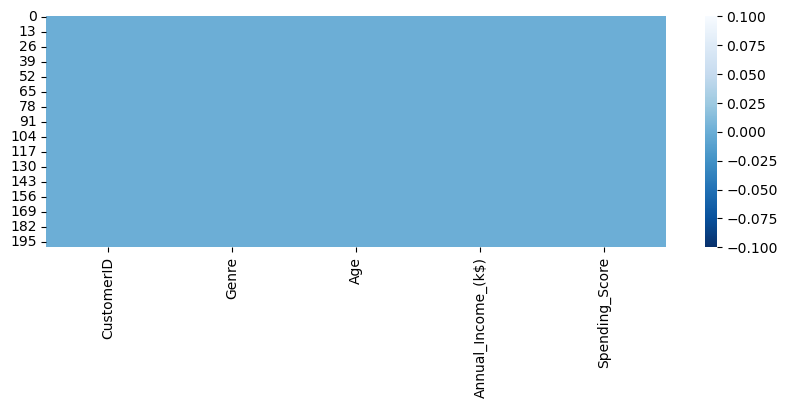

In [26]:
# Check for missing values
print(data.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(data.isnull(), cbar=True, cmap='Blues_r');

### Data Cleaning and Pre-processing

In [27]:
# Check for duplicates
print(data.duplicated().sum())

0


### Exploratory Data Analysis

#### Univariate analysis

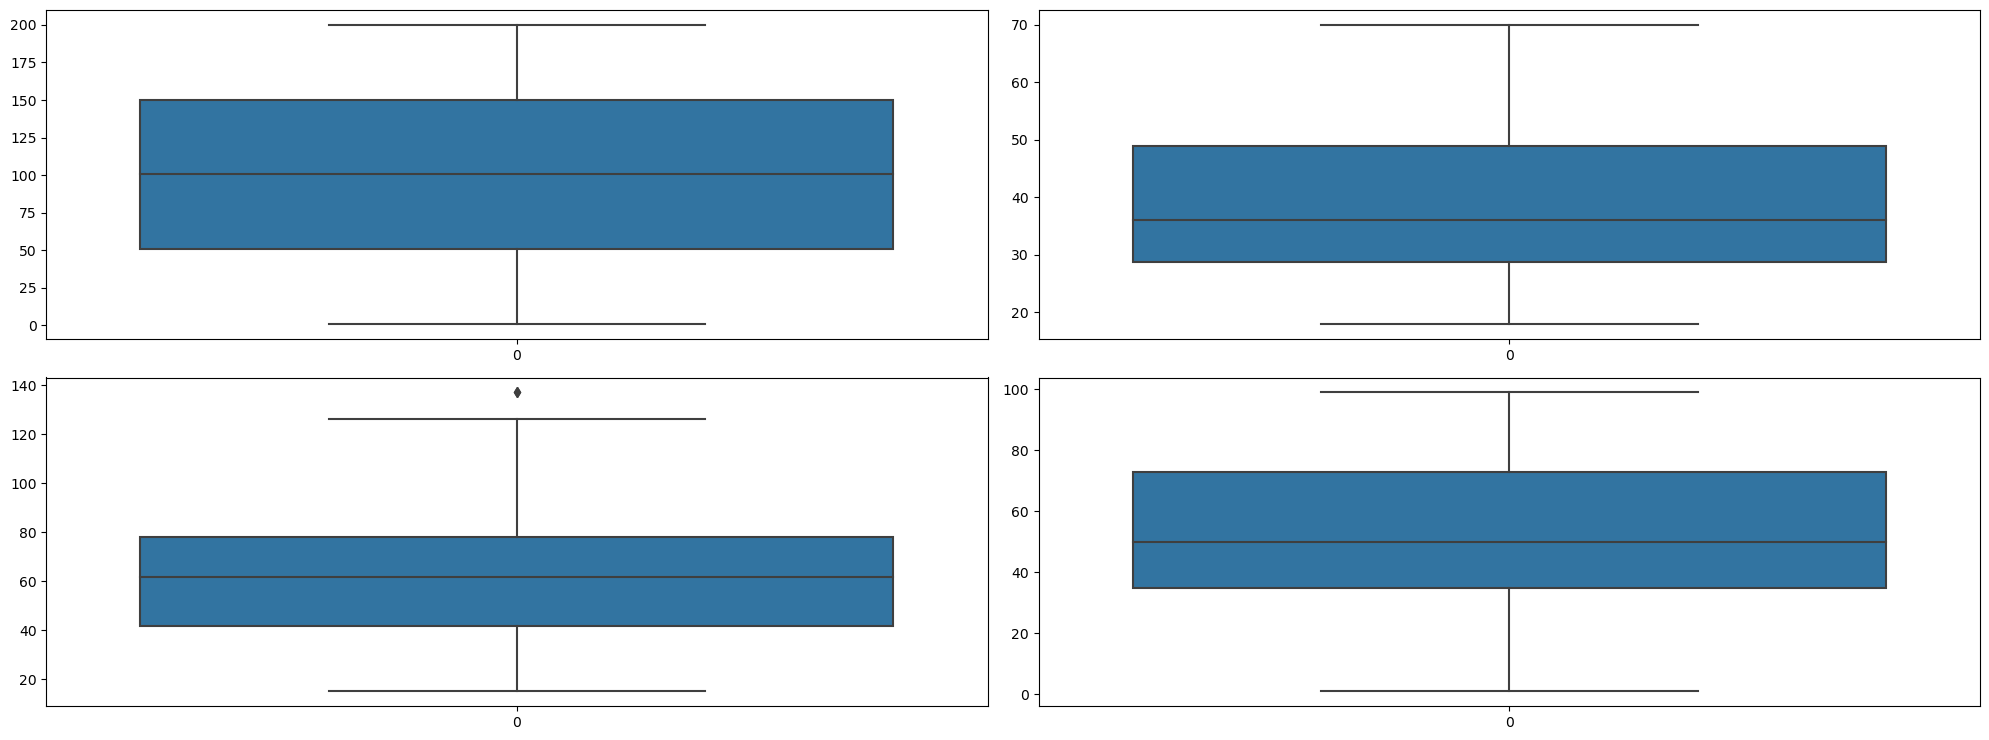

In [28]:
fig, axs = plt.subplots(2,2, figsize=(20,7.5))
plt1 = sns.boxplot(data['CustomerID'], ax=axs[0,0])
plt2 = sns.boxplot(data['Age'], ax=axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax=axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax=axs[1,1])

plt.tight_layout()

### Model

In [29]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns expect Survived
for c in data.columns[1:]:
    if(data[c].dtype=='object'):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]

data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [30]:
# Remove the unique identifer
data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


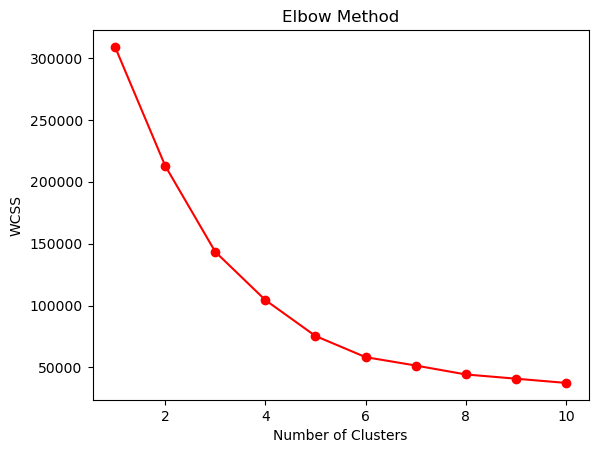

In [38]:
# Determine the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
# Fit K-means Clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)

# Add cluster labels to data
data['Cluster'] = kmeans.labels_

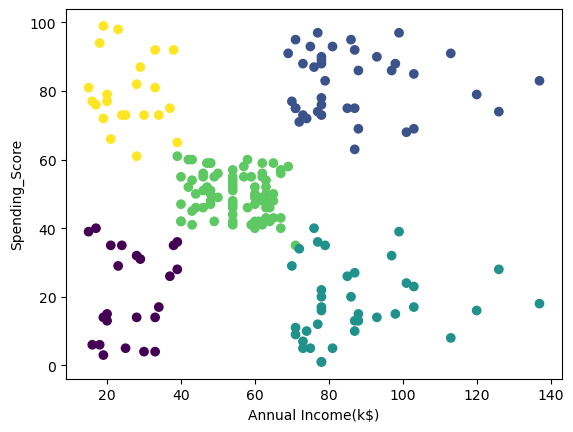

0.44493777835059417

In [74]:
# Visualize cluster results
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], label='Centroids')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending_Score')
plt.show()

# Calculate the Silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)

In [75]:
# Count the number of samples in each cluster
unique, counts = np.unique(data['Cluster'], return_counts=True)

# Print the number of samples in each cluster
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} samples")

Cluster 0: 23 samples
Cluster 1: 39 samples
Cluster 2: 37 samples
Cluster 3: 79 samples
Cluster 4: 22 samples


In conclusion, a total of 5 segments of customers are observed in relation to their annual income and their spending amounts. One segment which involve is composed of customers with an annual income approximately less than or equal to US40k, having an expenditure close to US40k or  less, while another segment with customers having the same income range having spent on the higher end which is between US60k and US100k yearly. The 3rd segment is composed of customers with an income ranging between US40k and US60k with the similar spending_score of between US40k and  US60k. The 4th segment of customers include those with an approximate income ranging between US70k and US140k having spent less than or equal to US40k and the last segment with the same income as that of segment 4, but with higher spent amount between US60k and US100k